# Linear Complementarity Problem

A common problem that can be cast to a VI is the linear complementarity problem [1]: given $\mathbf{q} \in \mathbb{R}^n$ and $0 \prec \mathbf{M} \in \mathbb{R}^{n \times n}$, one want to solve the following 

$$
\begin{equation}
    \label{eq:complementarity}
    \text{find $\mathbf{x} \in \mathbb{R}^n_{\geq 0}$ s.t. $\mathbf{y} = \mathbf{M}\mathbf{x} + \mathbf{q}$, $\mathbf{y}^\top \mathbf{x} = 0$}
\end{equation}
$$

By setting $F(\mathbf{x}) = - \mathbf{M}\mathbf{x} - \mathbf{q}$ and $\mathcal{S} = \mathbb{R}_{\geq 0}$ it can be readily verified that each solution for $(\mathbf{x} - \mathbf{x}^*)^\top F(\mathbf{x}^*) \geq 0$ is also a solution for $\eqref{eq:complementarity}$. 

## References
[1] Harker, P. T., & Pang, J. S. (1990). For the linear complementarity problem. Lectures in Applied Mathematics, 26, 265-284.


Using: pg
Using: eg
Using: popov
Using: fbf
Using: frb
Using: prg
Using: eag
Using: arg
Using: graal
Using: agraal
Using: hgraal_1
Using: hgraal_2


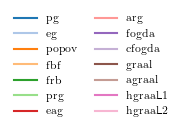

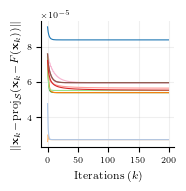

In [1]:
import numpy as np
import cvxpy as cp

from utils import *
from monviso import VI

np.random.seed(2024)

# Problem data
n = 5
q = np.random.uniform(-10, 10, size=n)
M = random_positive_definite_matrix(-10, 10, n)

# Define the mapping and constraints' set
F = lambda x: -(q + M @ x)
L = np.linalg.norm(M, 2)
S = [lambda x: x >= 0, lambda x: -q @ x - cp.quad_form(x, M) >= 0]

# Define the VI and the initial(s) points
lcp = VI(n, F, S=S)
x0 = []
x = cp.Variable(n)
for _ in range(2):
    prob = cp.Problem(
        cp.Minimize(np.random.rand(n) @ x),
        constraints=[constraint(x) for constraint in S],
    ).solve()
    x0.append(x.value)

# Solve the VI using the available algorithms
max_iter = 200
for algorithm, params in cases(x0, L, excluded={"fogda", "cfogda"}).items():
    print(f"Using: {algorithm}")
    sol = lcp.solution(
        algorithm,
        params,
        max_iter,
        log_path=f"logs/linear-complementarity/{algorithm}.log",
    )

plot_results(
    "logs/linear-complementarity",
    "figs/linear-complementarity.pdf",
    r"$\|\mathbf{x}_k \! - \! \text{proj}_{\mathcal{S}}(\mathbf{x}_k \! - \! F(\mathbf{x}_k))\|$",
)